# Lab: Classification
## CMSE 381 - Spring 2023
## Jan 27, 2023



In this module we are going to test out the classification methods we discussed in class 

## Getting a feel for the data

We're going to use the `Smarket` data set from the ISLR book as included in their R package.  I've included a csv with this notebook for you to use. 

This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, `Lag1` through `Lag5`. We have also recorded `Volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question) and `Direction` (whether the market was `Up` or `Down` on this date). Our goal is to predict `Direction` (a qualitative response) using the other features.

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline
import seaborn as sns

In [7]:
smarket = pd.read_csv('Smarket.csv', index_col = 0)

In [8]:
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


Note that the `Year` column only has the year information.  In the case of this data, the sorted order tracks the days, so be sure to not accidentally shuffle it! 

&#9989; **<font color=red>Do this:</font>** Write a brief description of the data set. Which of the available variables are quantitative? Which are categorical? Draw some plots of the data and get a feel for what the columns mean. 

there are 9 columns, year, lag(1-5), volume, today, and direction. there are 1250 rows in the dataset. the direction column is the only qualitative/categorical variable while the rest are quantitative. 

&#9989; **<font color=red>Do this:</font>** Take a look at the correlation matrix, which can be found with `dataframe.corr()`. Does it include all of the variables in the data set? What do you notice about the correlations?

*Hint: A great way to see what's going on with a matrix is to use the `plt.matshow` command.*

it does not include the direction column. also it is a correlation between the column name variables disregarding the only categorical variable. 

In [12]:
# Your code here #
smarket.corr()
#plt.matshow

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


&#9989; **<font color=red>Q:</font>** Do some further investigation on the high correlation value you saw in the previous step. Can you justify why that particular pair of variables has a high correlation? 

the highest correlation value we see is volume and year (0.539006), volume and lag4 (-0.048414), volume and lag2(-0.043383). the volume seems to have a correlation with year since as time goes on the volume is going to increase and lag2 and lag4 don't get nearly as high but are considerable. 

## Classification using Logistic Regression

Our goal is to predict `Direction`, a categorical variable taking as values the strings `Up` and `Down`.


For this module, we will largely use the tools from `sklearn`  for classification. One of the big perks of the `sklearn` module is that there is a great deal of uniformity in the classes. So once we have a handle on how to interact with one kind of classification tool, very minor tweaks in the code will allow for the use of a new model. In fact, many of the things we'll do today should look very similar in terms of the syntax to the linear regression lab from a few weeks ago. 

For our first try doing classification, we'll use `LogisticRegression` from the `sklearn.linear_model` module. I'm a huge fan of the `sklean` documentaiton since it includes a great deal of info on the math behind what we're doing as well as explanations on the code:
- [`sklearn` mathematical description of logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [`LogisticRegression` class documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [13]:
from sklearn.linear_model import LogisticRegression 

Lets first predict `Direction` using `Lag1`,`Lag2` and `Volume`. 
Our first job is to extract the portion of the dataframe that we want to use. `sklearn` is happiest when we hand it an array. 

In [14]:
X = np.array(smarket[['Lag1','Lag2','Volume']])
Y = np.array(smarket.Direction)

In [15]:
print(X.shape)
print(Y.shape)

(1250, 3)
(1250,)


Once we have our data, we create an instance of the model class we want, in this case `LogisticRegression`, and fit the model to the data. Note the `random_state=0` code ensures that rerunning the following box will return the same answer every time. 

In [16]:
clf = LogisticRegression(random_state=0)
clf.fit(X,Y)


LogisticRegression(random_state=0)

Great, that was easy! Once we've fit the model, the main task is to understand how to extract information from it. 

&#9989; **<font color=red>Do this:</font>** Extract the coefficients and intercept from the trained model. *(Note: You might need to take a look at the documentation to figure out how to do that.)* What is the equation, in terms of the variables used, that you are modeling? 

In [21]:
# Your code here
coeffs = pd.DataFrame(zip(X, clf.coef_))
coeffs

,0,1
0,"[0.381, -0.192, 1.1913]","[-0.07302967156869754, -0.042721617802769, 0.1..."


While it's good to know what equation we're modeling with, the big perk here is that your `sklearn` class will evaluate the data points of your model for you. Yay!

&#9989; **<font color=red>Do this:</font>** Use the `predict_proba` function to determine the probabilities $Pr(Y = \texttt{Down} \mid X)$ for the data set. What shape is the output matrix? Why that shape? What do the columns represent?

In [62]:
# Your code here
pred = clf.predict_proba(X)
pred
slay = pred[:,1]

Of course this gives us the probability of each each label for a given data, but we really would like to have the prediction itself. 


&#9989; **<font color=red>Do this:</font>** Use the `predict` function to determine the predictions for each input data point in the original $X$ matrix and store the output as `Yhat`. How many predictions are different than the actual `Direction` value? Whats the percent error for the model?

In [63]:
# Your code here
Yhat = clf.predict(X)
perc_err = (slay - Yhat)/slay *100

TypeError: unsupported operand type(s) for -: 'float' and 'str'

Percent Error = (Actual Value – Estimated Value)/(Exact value) × 100


&#9989; **<font color=red>Do this:</font>** An even easier way of figuring out the error rate is through the score. What does the output of `clf.score(X,Y)` mean and how is it related to the number you determined above?

In [40]:
# Your code here
clf.score(X,Y)

0.5336

this si the error rate of x vs y columns therefore it should be similar to the above solution. 

**Confusion matrix**

As we saw in class, the percent error is a rather limited way of evaluating the classification model. Luckily `sklearn` provides commands for computing the confusion matrix for a given model easily. The `confusion_matrix` command computes the confusion matrix, and `ConfusionMatrixDisplay` gives a nice visual representation. 

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [65]:
# This code gives the confusion matrix, assuming you stored the predicted values as `Yhat`.
C = confusion_matrix(Y,Yhat)

C

array([[147, 455],
       [128, 520]])

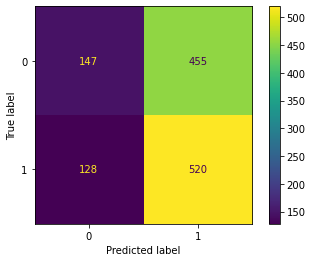

In [66]:
# This code gives a visual representation 
ConfusionMatrixDisplay(C).plot()



&#9989; **<font color=red>Q:</font>** The makers of `sklearn` made a PARTICULARY strange choice when it comes to the confusion matrix representation.  What is different about the `sklearn` confusion matrix from how we saw it in class?

it is less helpful in the points shown i feel. there is a row on the side of color variation and the value is inside the square. 



-----
### Congratulations, we're done!


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.